# Computer Vision - Object Detection $\;\;\;\;\;\;$                       Max Sanii $\;\;\;\;\;\;$                              12/11/2021

## <br>Project Contents:
- 1. Create a class for Yolo model
- 2. Create preprocessing Methods
- 3. Perform Preprocessing on images
- 4. Perform Detection on multiple test images
- 5. Evaluate the model performance


In [182]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

In [171]:
# Set the relative paths

# Path to the Yolo's new weight and config file after training
path_yolo_weights = "C:/Users/HP/Desktop/School/CLASS - Computer Vision/Examples_Detection/trained_weights/new-12-08-2021-final/"
# Path to some test images
path_test_images = "C:/Users/HP/Desktop/School/CLASS - Computer Vision/Examples_Detection/Test Dataset/"
# Path to test images for evaluating the model
path_performance_test = "C:/Users/HP/Desktop/School/CLASS - Computer Vision/Examples_Detection/Test Dataset-main/"

## Create a class for our Yolo Detector Model
The class contains a constructor and a method, the constructor loads the new weights and config files into Yolo model by using the Darknet framework.
The method performs the actual detection and counting the number of scooters in an image.

In [168]:
class YoloDetector:
 
    # Default constructor
    def __init__(self):    
        # Final weights(65 sample dataset) - 12/08/2021
        self.weightPath = path_yolo_weights + "yolov4-custom_final.weights"
        self.configPath = path_yolo_weights + "yolov4-custom.cfg"              
        
        # Load our new weight and config files for the Yolo model
        self.net = cv2.dnn.readNetFromDarknet(self.configPath, self.weightPath)
        self.model = cv2.dnn_DetectionModel(self.net) 
        self.model.setInputParams(scale=1 / 255, size=(416, 416), swapRB=True)

        
    # Function for counting the scooters in an image
    def countScooters(self, img, display=0, returnType=0):
        classIds, scores, boxes = self.model.detect(img, confThreshold=0.6, nmsThreshold=0.4)

        counter = 0
        for (classId, score, box) in zip(classIds, scores, boxes):
            if score < 0.6:
                # Skip detection with low confidence
                continue

            counter+=1
            cv2.rectangle(img, (box[0], box[1]), (box[0] + box[2], box[1] + box[3]),
                          color=(0, 255, 0), thickness=2)
            title =  str(round(score, 3))
            cv2.putText(img, title, (box[0], box[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, 1,
                        color=(0, 255, 0), thickness=2)
        # Display the image
        if display == 1:       
            # Display the detected scooters in matplotlib figure 
            plt.imshow(img)
            plt.xticks([]), plt.yticks([]) 
            plt.show()
        
        if returnType == 1:
            return len(boxes)
        else:
            return "Number of Detected Scooters: " + str(len(boxes))
            
        

## Image Pre-preocessing Methods

In [139]:
# Resize image
def resizeImage(img, percent):
    scale_percent = percent # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)  
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)    
    return img

# Denoise the image
def denoiseImage(img, level):
    if level == 1:
        denoised = cv2.fastNlMeansDenoisingColored(img,None,3,3,7,21)
    if level == 2:
        denoised = cv2.fastNlMeansDenoisingColored(img,None,5,5,7,21)
    if level == 3:
        denoised = cv2.fastNlMeansDenoisingColored(img,None,15,15,7,21)
    return denoised

# Increase brightness of the image
def increase_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img


## Perform pre-processsing
Test our pre-processing methods on a sample image with distorted condition

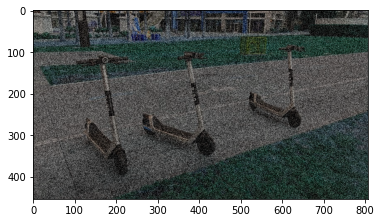

In [172]:
# Display the original distorted image
imagePath = path_test_images + 'dark-threeScooters_noise.jpg'
test_img = cv2.imread(imagePath)

plt.imshow(test_img)
plt.show()

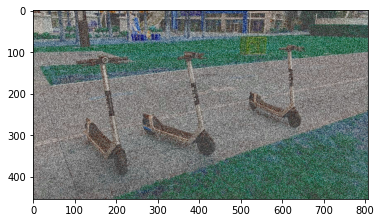

In [173]:
# Brightness
brightened_img = increase_brightness(test_img, value=50)
plt.imshow(brightened_img)
plt.show()

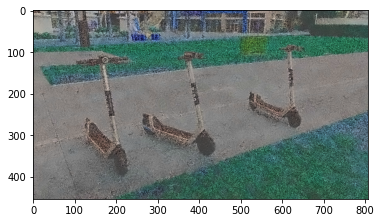

In [174]:
# Denoise
denoised_img = denoiseImage(brightened_img, 3)
plt.imshow(denoised_img)
plt.show()

## Perform object detection with our Yolo model
Using our new trained Yolo model to perform detection of scooters in some test images

In [175]:
# creating object of the class
obj = YoloDetector()

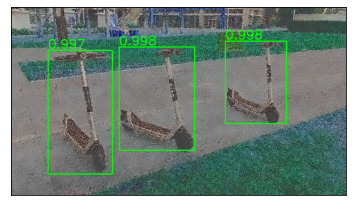

Number of Detected Scooters: 3


In [176]:
# Test 1

result = obj.countScooters(denoised_img, 1)
print(result)

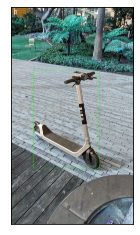

Number of Detected Scooters: 1


In [177]:
# Test 2

imagePath = path_test_images + 'simpleGray.jpg'

# read the sample image
img_original = cv2.imread(imagePath)

# calling the instance method using the object obj
result = obj.countScooters(img_original, 1)
print(result)

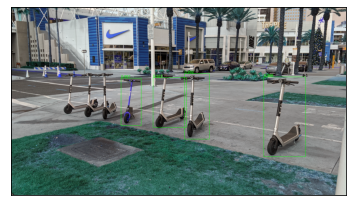

Number of Detected Scooters: 4


In [178]:
# Test 3

imagePath = path_test_images + 'multiple_separated.jpg'

# read the sample image
img_original = cv2.imread(imagePath)

# resize the image
img = resizeImage(img_original, 80)

# calling the instance method using the object obj
result = obj.countScooters(img, 1)
print(result)

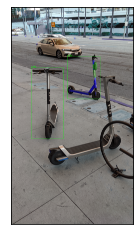

Number of Detected Scooters: 2


In [179]:
# Test 4

imagePath = path_test_images + 'scooters_car.jpg'

# read the sample image
img_original = cv2.imread(imagePath)

# calling the instance method using the object obj
result = obj.countScooters(img_original, 1)
print(result)

## Evaluate the performance of the model with the test data
Using 15 images with defined number of scooters in each image, it evaluates whether the model can successfully detect all the scooters. 

In [183]:
image_list = []
# Define the actual count for each image
label_list = [3,4,4,1,2,2,4,7,2,1,2,2,1,4,2]

# Initiate the Yolo class
obj = YoloDetector()

# Load the test dataset
for filename in glob.glob(path_performance_test + '*.jpg'):
    img = cv2.imread(filename)
    image_list.append(img)

total_detected = 0
total_actual = 0
count = 1

# Test the performance with the test dataset    
for x in range(len(image_list)):
    print('-------------------------------------')
    print('Test# ' + str(count))
    count += 1
    # Call the function to count detected scooters
    result = obj.countScooters(image_list[x], 0, 1)
    print('Detected: ' + str(result))
    print('Actual Count: ' + str(label_list[x]))
    total_detected += result
    total_actual += label_list[x]

    
print('---------------- Performance Result ---------------------')
print('Total Detected: ' + str(total_detected))
print('Actual Count: ' + str(total_actual))
print('Success Rate: ' + str(round(total_detected/total_actual, 2)))

-------------------------------------
Test# 1
Detected: 1
Actual Count: 3
-------------------------------------
Test# 2
Detected: 2
Actual Count: 4
-------------------------------------
Test# 3
Detected: 1
Actual Count: 4
-------------------------------------
Test# 4
Detected: 1
Actual Count: 1
-------------------------------------
Test# 5
Detected: 2
Actual Count: 2
-------------------------------------
Test# 6
Detected: 2
Actual Count: 2
-------------------------------------
Test# 7
Detected: 2
Actual Count: 4
-------------------------------------
Test# 8
Detected: 2
Actual Count: 7
-------------------------------------
Test# 9
Detected: 3
Actual Count: 2
-------------------------------------
Test# 10
Detected: 1
Actual Count: 1
-------------------------------------
Test# 11
Detected: 2
Actual Count: 2
-------------------------------------
Test# 12
Detected: 2
Actual Count: 2
-------------------------------------
Test# 13
Detected: 0
Actual Count: 1
----------------------------------